In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# Загрузка данных
data_path = 'C:/Users/Marti/Homework/Cancer_Data.csv'
df = pd.read_csv(data_path)

# Предобработка данных
# Удаление ненужных столбцов
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

# Замена строковых значений на числовые
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Разделение на признаки и метки
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Сохранение масштабировщика для дальнейшего использования
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import learning_curve


# Функция для обучения и оценки моделей
def train_and_evaluate_model(model, name):
    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на тестовых данных
    y_pred = model.predict(X_test)

    # Расчет метрик
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    # Вывод результатов
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")

    # Построение кривых обучения
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy', n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(f"Learning Curve - {name}")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, '-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()
    
    # Сохранение модели в файл
    filename = f"{name}.pkl"
    joblib.dump(model, filename)
    print(f"Model saved as {filename}")
    print("===========================================")


Model: Random Forest
Accuracy: 0.9649
Precision: 0.9756
Recall: 0.9302
F1 Score: 0.9524
AUC: 0.9581


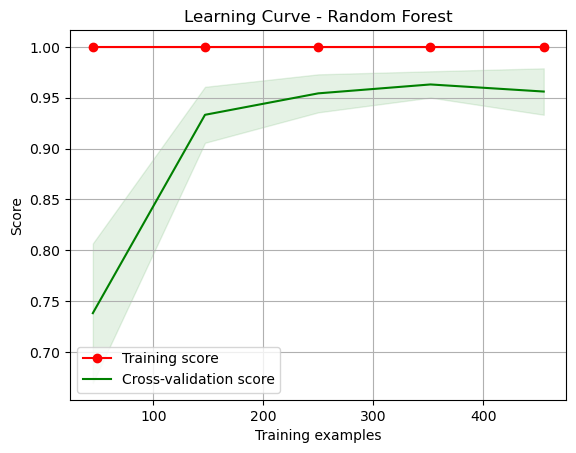

Model saved as Random Forest.pkl


In [4]:
# Создание и обучение моделей
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate_model(rf_model, "Random Forest")


Model: SVM
Accuracy: 0.9561
Precision: 0.9318
Recall: 0.9535
F1 Score: 0.9425
AUC: 0.9556


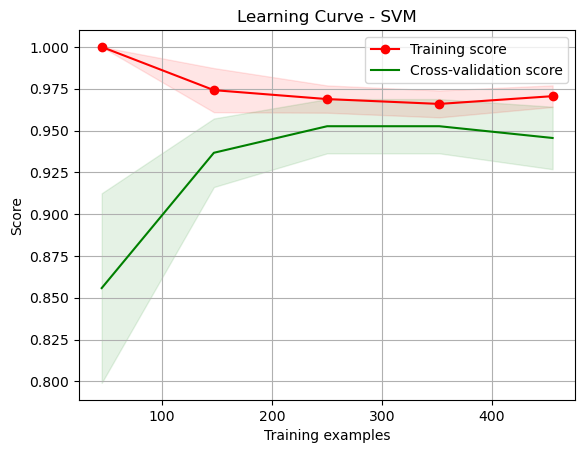

Model saved as SVM.pkl


In [5]:
svm_model = SVC(kernel='linear', probability=True, random_state=42)
train_and_evaluate_model(svm_model, "SVM")

Model: KNN
Accuracy: 0.9474
Precision: 0.9302
Recall: 0.9302
F1 Score: 0.9302
AUC: 0.9440


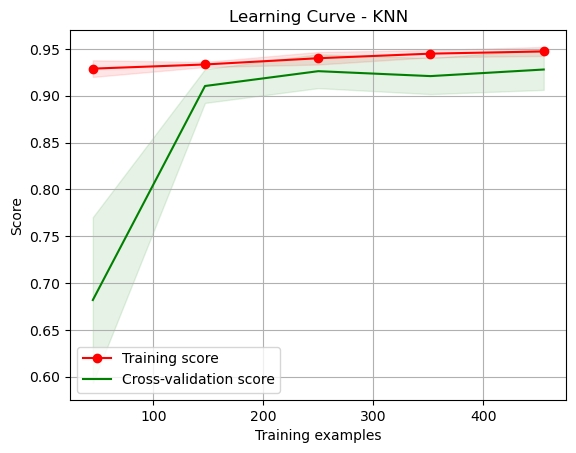

Model saved as KNN.pkl


In [6]:
knn_model = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate_model(knn_model, "KNN")


Model: LightGBM
Accuracy: 0.9649
Precision: 0.9756
Recall: 0.9302
F1 Score: 0.9524
AUC: 0.9581


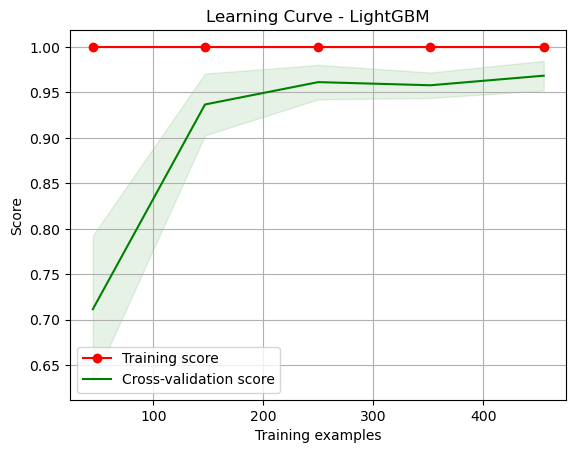

Model saved as LightGBM.pkl


In [7]:
lgbm_model = LGBMClassifier(boosting_type='gbdt', n_estimators=100, random_state=42)
train_and_evaluate_model(lgbm_model, "LightGBM")

Model: Ensemble
Accuracy: 0.9737
Precision: 0.9762
Recall: 0.9535
F1 Score: 0.9647
AUC: 0.9697


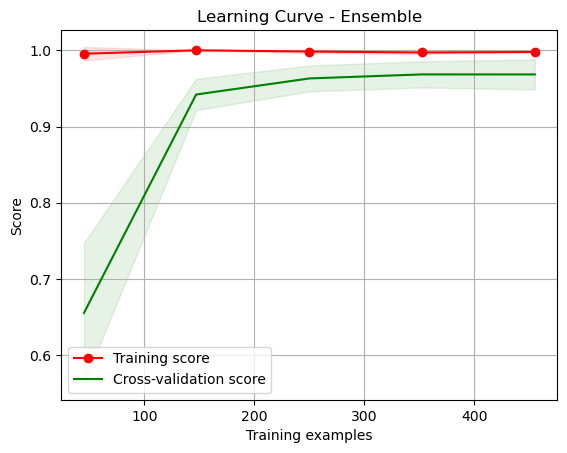

Model saved as Ensemble.pkl


In [8]:
from sklearn.ensemble import VotingClassifier

# Составление ансамбля из 4-х моделей
ensemble_model = VotingClassifier(estimators=[('Random Forest', rf_model), ('SVM', svm_model), ('KNN', knn_model), ('LightGBM', lgbm_model)], 
                                  voting='soft')
train_and_evaluate_model(ensemble_model, "Ensemble")


In [21]:
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
import joblib

# Функция загрузки модели
def load_model():
    model_path = filedialog.askopenfilename(title="Выберите файл модели", filetypes=[("Модель", "*.pkl")])
    try:
        global model
        model = joblib.load(model_path)
        messagebox.showinfo("Успех", "Модель успешно загружена!")
    except Exception as e:
        messagebox.showerror("Ошибка", f"Не удалось загрузить модель: {str(e)}")

# Функция загрузки данных и предсказания
def predict():
    data_path = filedialog.askopenfilename(title="Выберите файл с данными", filetypes=[("Данные", "*.csv")])
    try:
        # Загрузка данных
        data = pd.read_csv(data_path)
        
        # Удаление ненужных столбцов
        data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
        
        # Замена строковых значений на числовые
        data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
        
        # Масштабирование
        scaler_p = joblib.load('C:/Users/Marti/Homework/scaler.pkl')
        data_scaled = scaler_p.fit_transform(data)
        data_scaled[np.isnan(data_scaled)] = 0
        data_scaled[np.isinf(data_scaled)] = 0
        data_scaled = data_scaled[:, :30]
        
        predicted = model.predict(data_scaled)
        
        messagebox.showinfo("Результаты предсказания", f"Предсказанные значения: {predicted}")
    except Exception as e:
        messagebox.showerror("Ошибка", f"Не удалось выполнить предсказания: {str(e)}")

# Создание окна приложения
root = tk.Tk()
root.title("Программа предсказания на основе сохраненной модели")

# Кнопка загрузки модели
load_model_btn = tk.Button(root, text="Загрузить модель", command=load_model)
load_model_btn.pack(pady=10)

# Кнопка загрузки данных и выполнения предсказания
predict_btn = tk.Button(root, text="Загрузить данные и выполнить предсказание", command=predict)
predict_btn.pack(pady=10)

# Запуск главного цикла приложения
root.mainloop()
